Load and Inspect Data

In [4]:
import pandas as pd

df = pd.read_csv("Sales Dataset.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year-Month'] = pd.to_datetime(df['Year-Month'])

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1194 non-null   object        
 1   Amount        1194 non-null   int64         
 2   Profit        1194 non-null   int64         
 3   Quantity      1194 non-null   int64         
 4   Category      1194 non-null   object        
 5   Sub-Category  1194 non-null   object        
 6   PaymentMode   1194 non-null   object        
 7   Order Date    1194 non-null   datetime64[ns]
 8   CustomerName  1194 non-null   object        
 9   State         1194 non-null   object        
 10  City          1194 non-null   object        
 11  Year-Month    1194 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 112.1+ KB
None
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-26776    9726    1275         5  Electron

Data Cleaning

In [5]:
df.drop_duplicates(inplace=True)
df = df[df['Amount'] >= 0]


Aggregate for Forecasting

In [6]:
monthly_sales = df.groupby('Year-Month')['Amount'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']  # Rename for Prophet


EDA

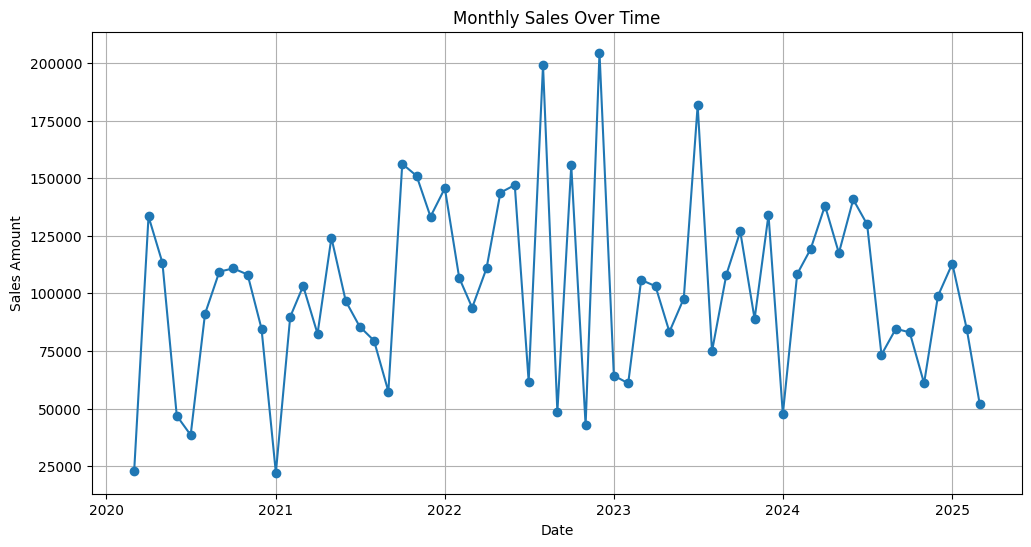

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['ds'], monthly_sales['y'], marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()


1. Geographic Insights

C:\Users\ketan\AppData\Local\Temp\ipykernel_16004\1780180552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='Spectral')


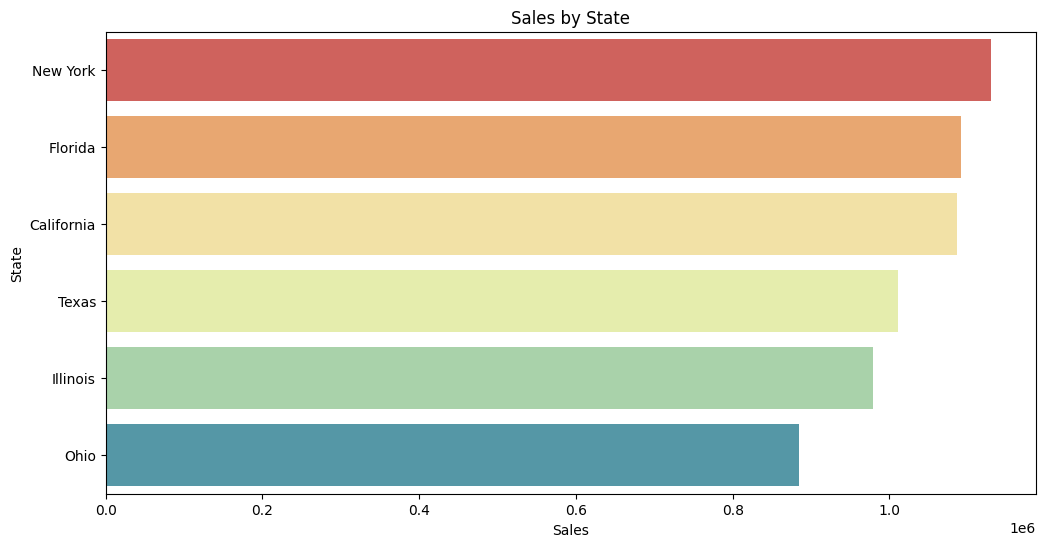

C:\Users\ketan\AppData\Local\Temp\ipykernel_16004\1780180552.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_profit.values, y=city_profit.index, palette='cubehelix')


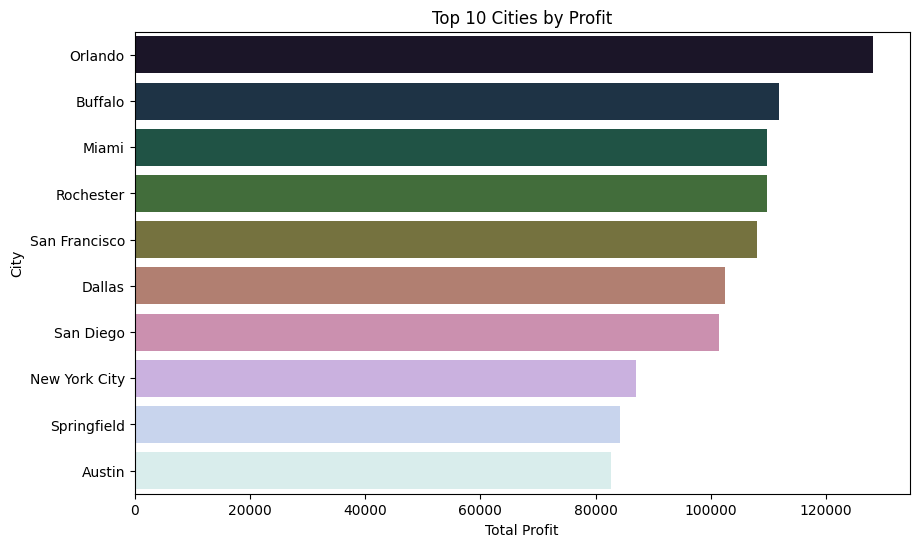

In [24]:
#by state
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='Spectral')
plt.title("Sales by State")
plt.xlabel("Sales")
plt.show()

#by city
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_profit.values, y=city_profit.index, palette='cubehelix')
plt.title("Top 10 Cities by Profit")
plt.xlabel("Total Profit")
plt.show()



2. Customer Behavior Analysis

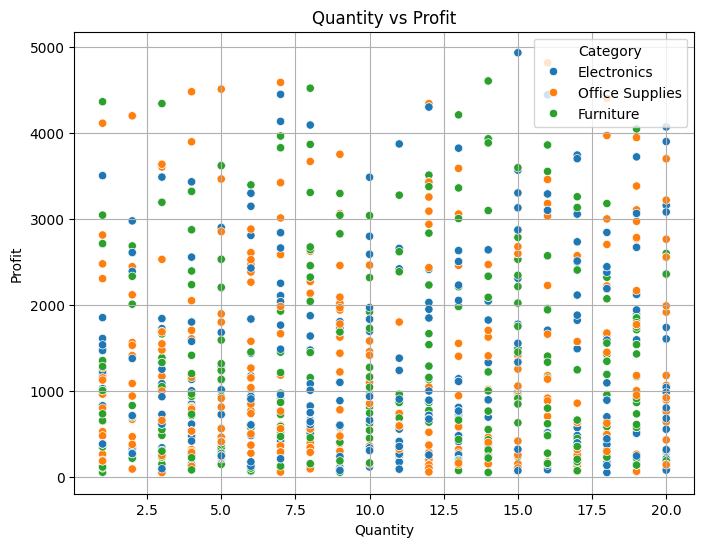

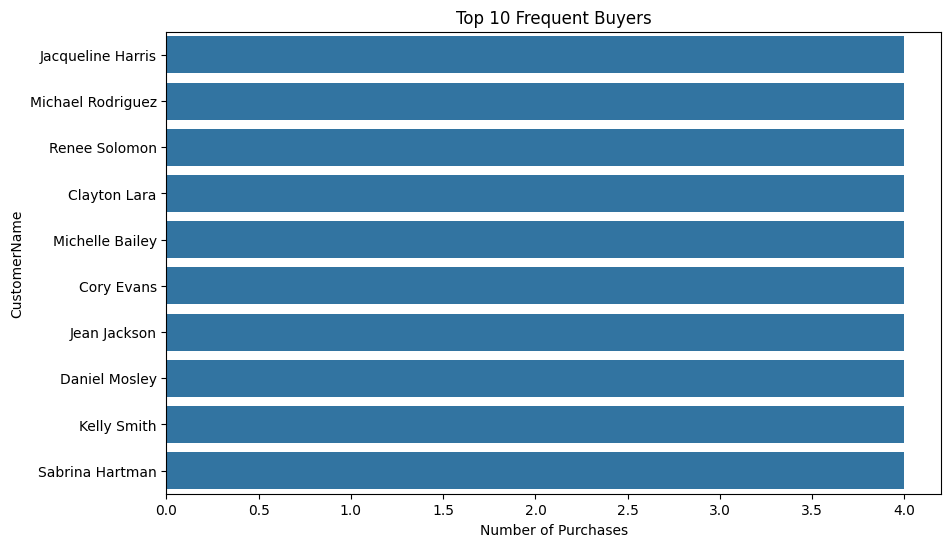

In [30]:
#quantity vs profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Category')
plt.title("Quantity vs Profit")
plt.grid(True)
plt.show()

#purchase freq
customer_freq = df['CustomerName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=customer_freq.values, y=customer_freq.index)
plt.title("Top 10 Frequent Buyers")
plt.xlabel("Number of Purchases")
plt.show()



- Clustering

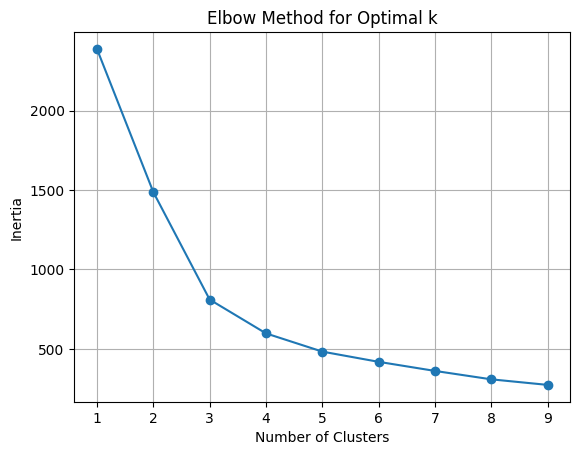

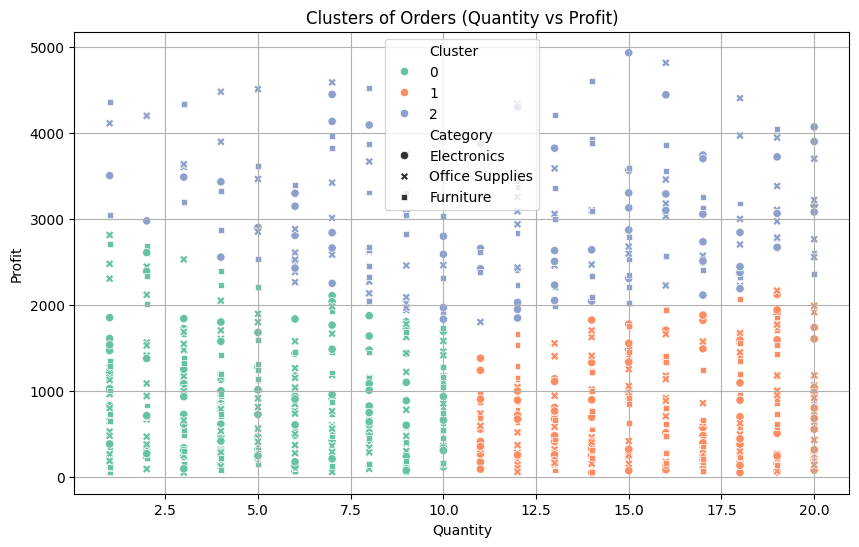

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features
X = df[['Quantity', 'Profit']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


#k-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


#visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Cluster', palette='Set2', style='Category')
plt.title("Clusters of Orders (Quantity vs Profit)")
plt.grid(True)
plt.show()


ForeCast Future Sales

In [31]:
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


19:38:41 - cmdstanpy - INFO - Chain [1] start processing
19:38:41 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ketan\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


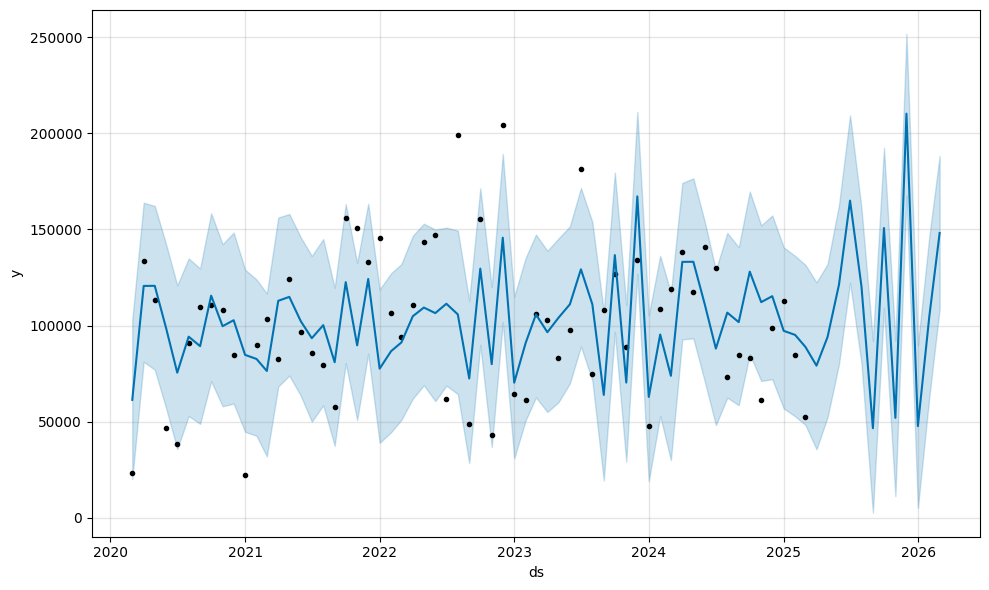

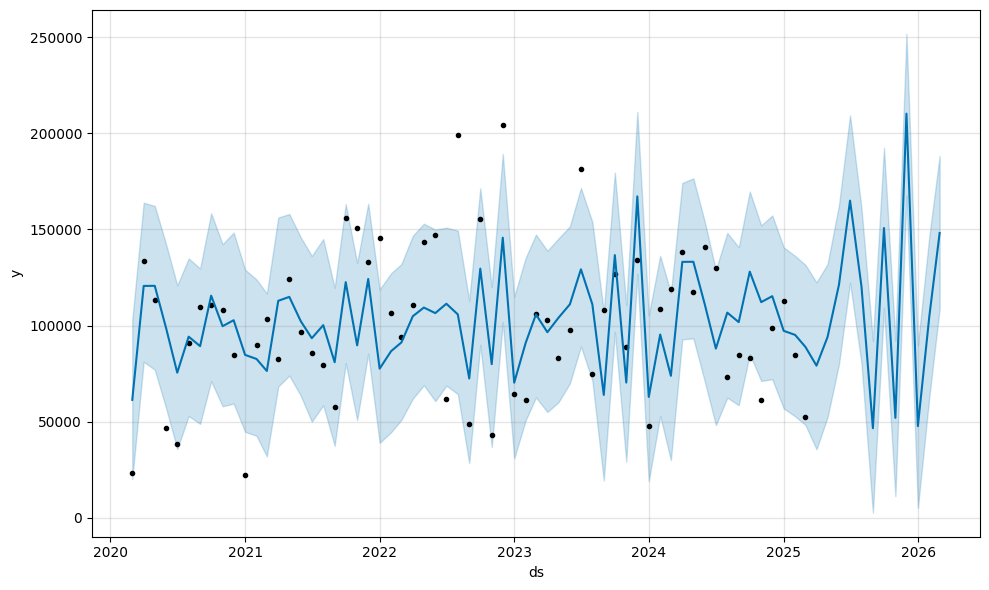

In [25]:
from prophet import Prophet

model = Prophet()
model.fit(monthly_sales)

future = model.make_future_dataframe(periods=12, freq='M')  # Next 6 months
forecast = model.predict(future)

model.plot(forecast)


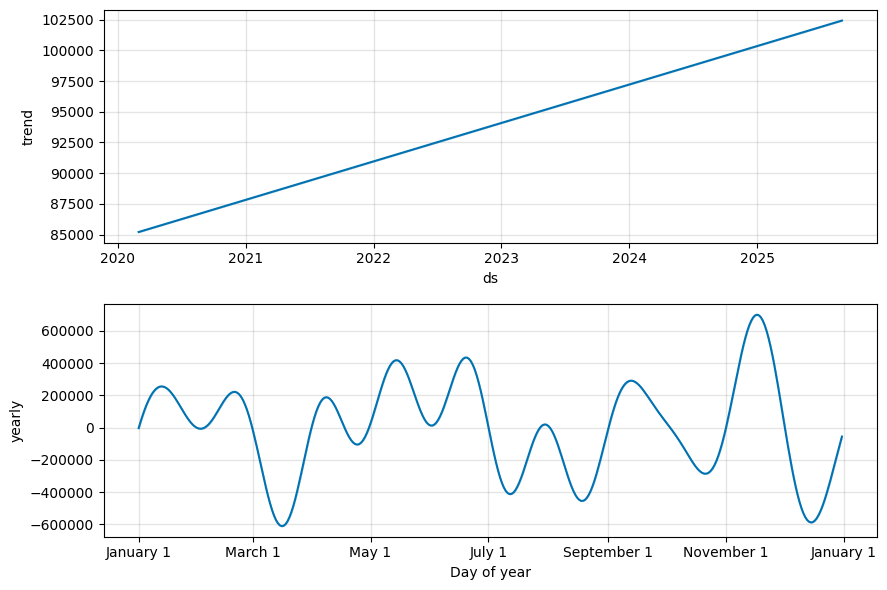

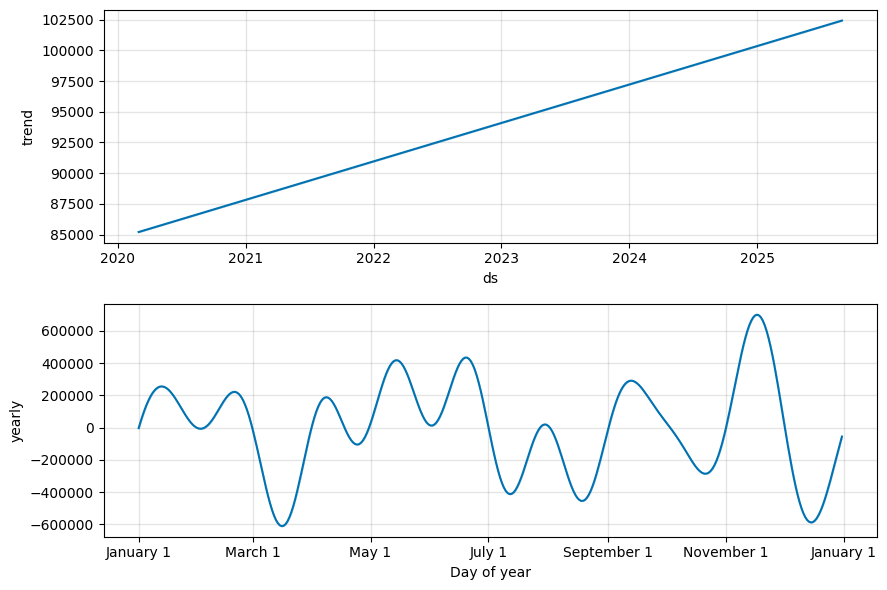

In [11]:
model.plot_components(forecast)


Forecast Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error

y_true = monthly_sales['y'][-6:].values
y_pred = forecast['yhat'][-6:].values
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)


MAE: 25465.607367895584


Business Intelligence Insights

Top Performing Categories and Sub-Categories

C:\Users\ketan\AppData\Local\Temp\ipykernel_16004\2027732308.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_d")


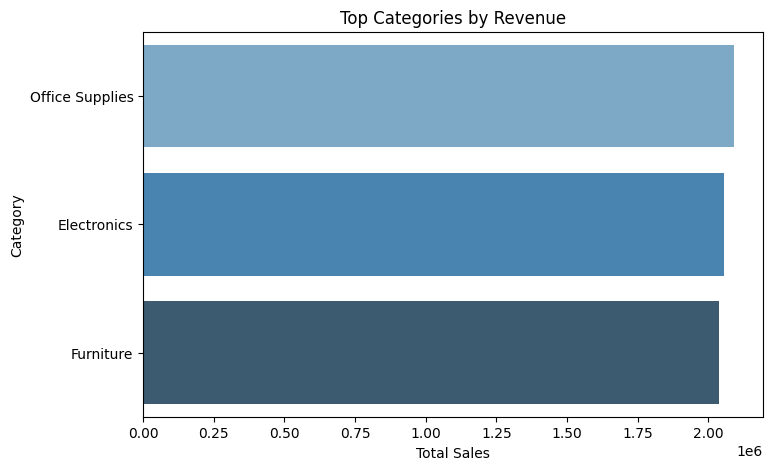

C:\Users\ketan\AppData\Local\Temp\ipykernel_16004\2027732308.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette="Greens_d")


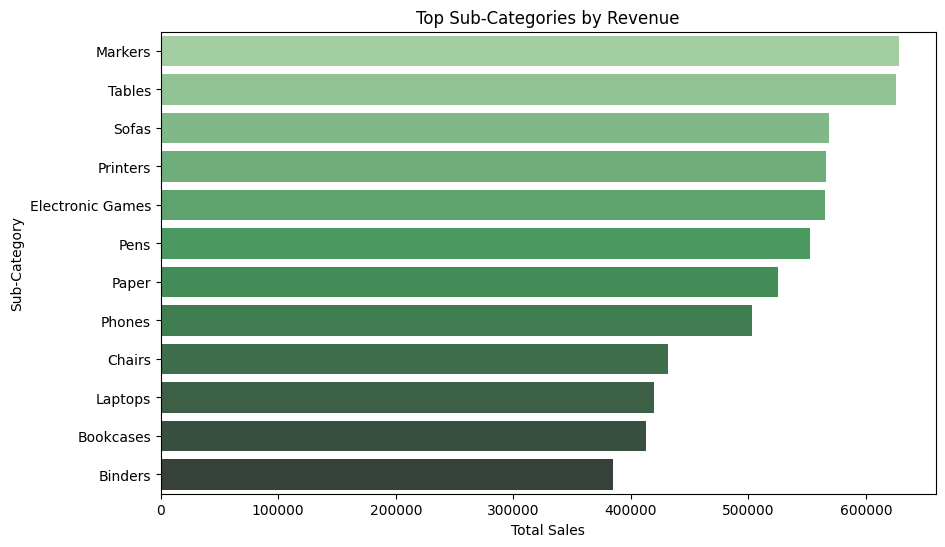

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Categories by Revenue
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_d")
plt.title("Top Categories by Revenue")
plt.xlabel("Total Sales")
plt.show()

# Top Sub-Categories
top_subcategories = df.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette="Greens_d")
plt.title("Top Sub-Categories by Revenue")
plt.xlabel("Total Sales")
plt.show()


Sales vs Profit by State(Heatmap)

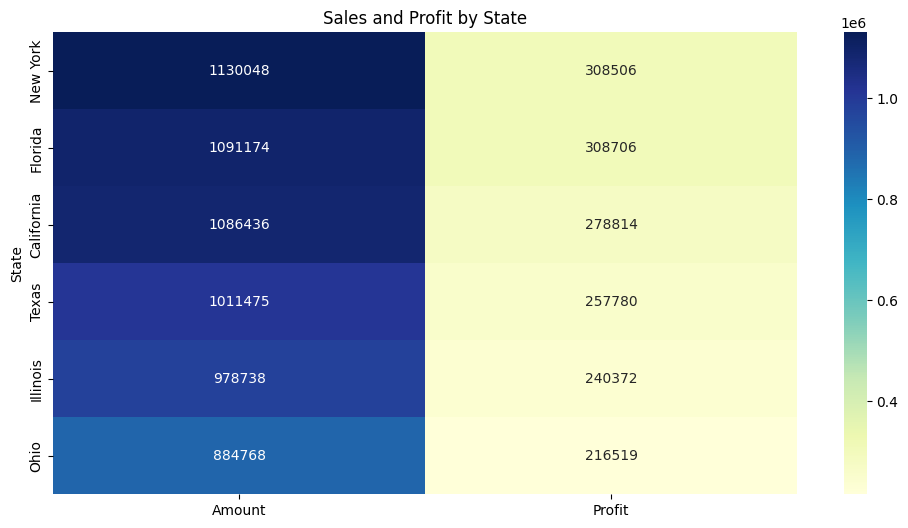

In [14]:
state_sales_profit = df.groupby('State')[['Amount', 'Profit']].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(12, 6))
sns.heatmap(state_sales_profit, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales and Profit by State")
plt.show()


Profitability Analysis(Quantity vs Profit)

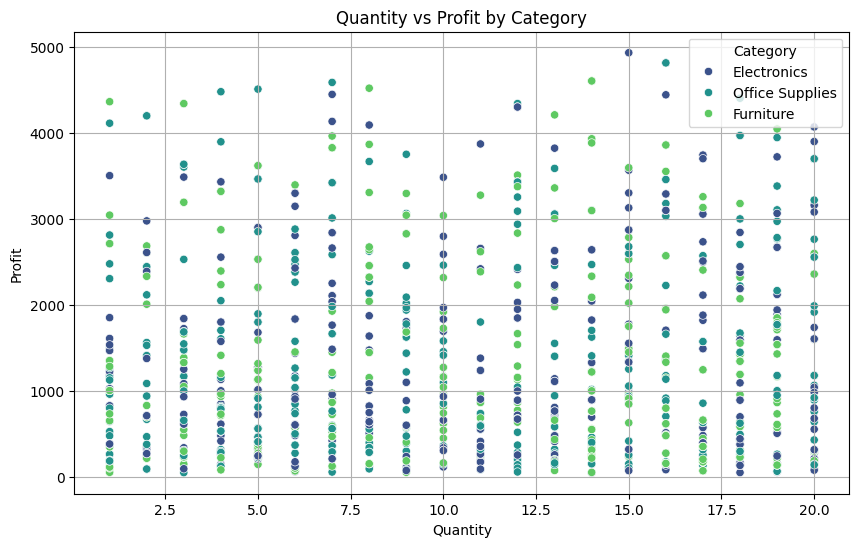

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Category', palette='viridis')
plt.title("Quantity vs Profit by Category")
plt.grid(True)
plt.show()


Monthly Sales Trend

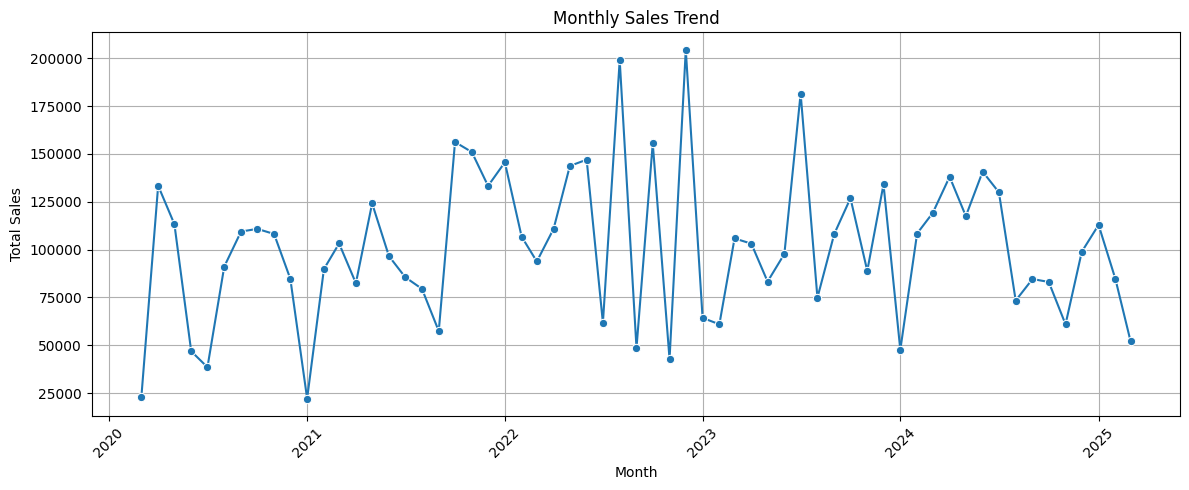

In [17]:
monthly_trend = df.groupby('Year-Month')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_trend, x='Year-Month', y='Amount', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


Payment Mode Distribution

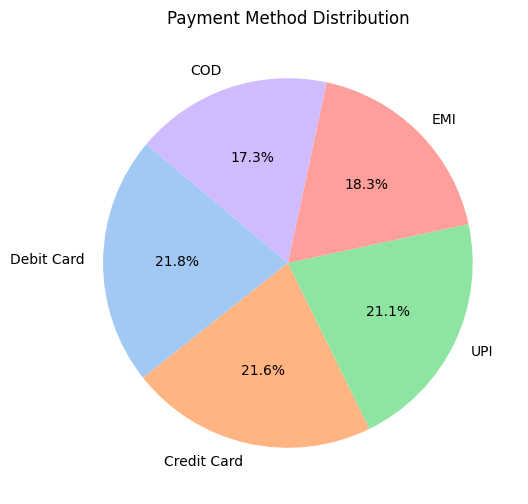

In [18]:
payment_dist = df['PaymentMode'].value_counts()

plt.figure(figsize=(6, 6))
payment_dist.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


Top Customers by Total Purchase

C:\Users\ketan\AppData\Local\Temp\ipykernel_16004\3184969437.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")


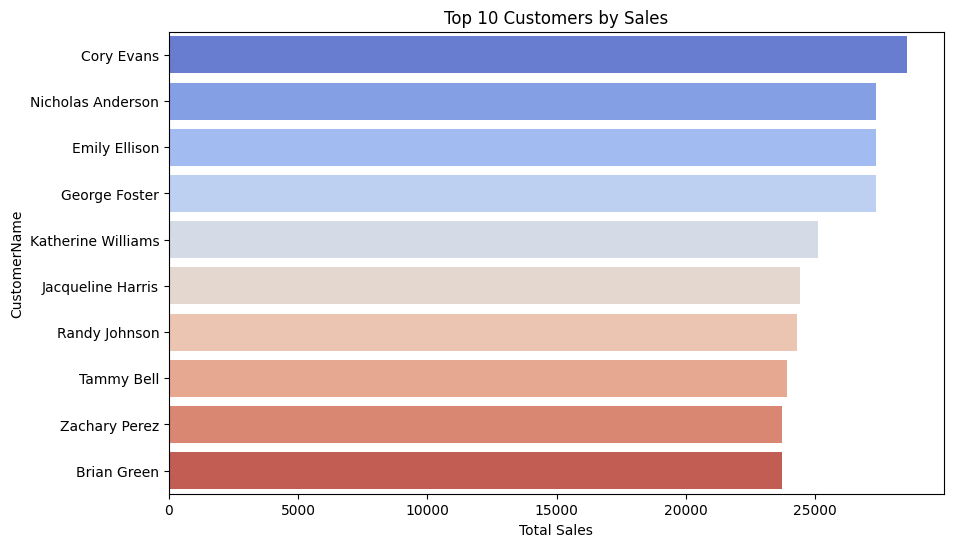

In [19]:
top_customers = df.groupby('CustomerName')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.show()
